# Clustering Assignment Solutions

## 1. K-Means Clustering

In [1]:
# 1. Read in the cereal.csv file
import pandas as pd

df = pd.read_csv('../Data/cereal.csv')
df.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,100%_Bran,Nabisco,70,4,1,6,25
1,100%_Natural_Bran,Quaker Oats,120,3,5,8,0
2,All-Bran,Kelloggs,70,4,1,5,25
3,All-Bran_with_Extra_Fiber,Kelloggs,50,4,0,0,25
4,Almond_Delight,Ralston Purina,110,2,2,8,25


In [2]:
# 2. Prep the data by dropping the name and manufacturer columns: aka only keep the numeric columns
data = df[['Calories', 'Protein (g)', 'Fat', 'Sugars', 'Vitamins and Minerals']]
# df.iloc[:, 2:]
data.head()

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,70,4,1,6,25
1,120,3,5,8,0
2,70,4,1,5,25
3,50,4,0,0,25
4,110,2,2,8,25


In [3]:
# 3. Fit a K-Means Clustering model with 2 clusters
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=2, n_init='auto', random_state=42)
kmeans2.fit(data)

KMeans(n_clusters=2, random_state=42)

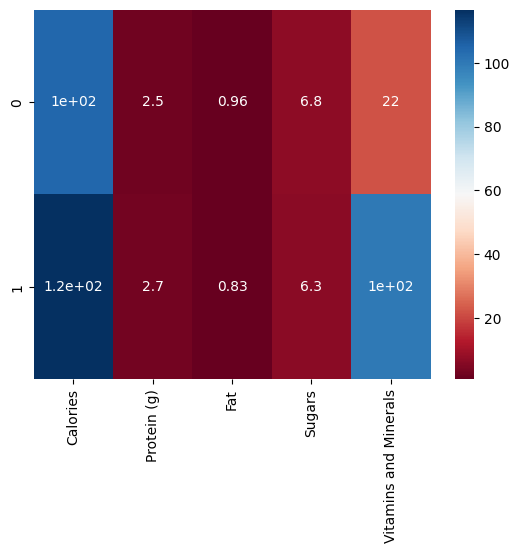

In [4]:
# 4. Interpret the cluster centers
import seaborn as sns

cluster_centers2 = pd.DataFrame(kmeans2.cluster_centers_, columns=data.columns)
sns.heatmap(cluster_centers2, cmap='RdBu', annot=True);

* Cluster 1: **Low in Vitamins and Minerals (Cereal for Kids)**
* Cluster 2: **High in Calories, Vitamins and Minerals (Cereal for Adults)**

## 2. Inertia Plot

In [5]:
# 1. Write a loop to fit K-Means Clustering models with 2 to 15 clusters

# create an empty list to hold many inertia values
inertia_values = []

# create 2 - 15 clusters, and add the intertia scores to the list
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

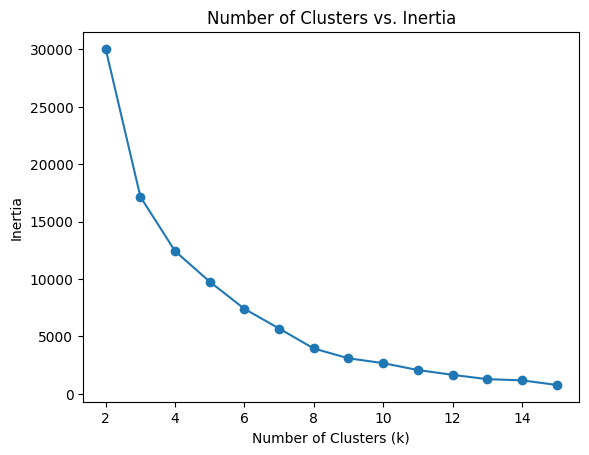

In [6]:
# 2. Create a plot with the number of clusters on the x-axis and the inertia on the y-axis

# plot the inertia values
import matplotlib.pyplot as plt

# turn the list into a series for plotting
inertia_series = pd.Series(inertia_values, index=range(2, 16))

# plot the data
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

In [7]:
# 3. Identify the elbow of the plot: biggest drop seems to be at 3 clusters

In [8]:
# 4. Fit a K-Means Clustering model on the specific number of clusters at the elbow
from sklearn.cluster import KMeans

kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans3.fit(data)

KMeans(n_clusters=3, random_state=42)

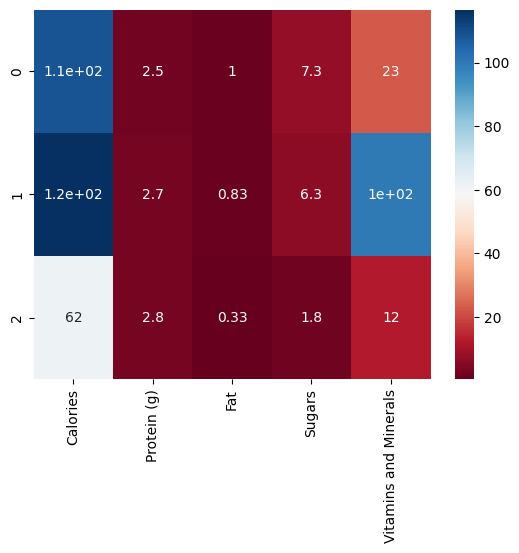

In [9]:
# 5. Interpret the cluster centers using a heat map
import seaborn as sns

cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns=data.columns)
sns.heatmap(cluster_centers3, cmap='RdBu', annot=True);

* Cluster 0: **In the Middle (Typical Cereals)**
* Cluster 1: **High in Calories & Vitamins and Minerals (Hearty Cereals)**
* Cluster 2: **Average/Low in Calories & Vitamins and Minerals (Empty Cereals)**

## 3. Tune the K-Means Model

In [14]:
# view the data again
data.head()

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,70,4,1,6,25
1,120,3,5,8,0
2,70,4,1,5,25
3,50,4,0,0,25
4,110,2,2,8,25


In [15]:
# 1. Remove the ”Fat” column
# data_subset = data[['Calories', 'Protein (g)', 'Sugars', 'Vitamins and Minerals']]
data_subset = data.drop(columns=['Fat'])
data_subset.head()

,Calories,Protein (g),Sugars,Vitamins and Minerals
0,70,4,6,25
1,120,3,8,0
2,70,4,5,25
3,50,4,0,25
4,110,2,8,25


In [16]:
# 2. Standardize the remaining columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_ft = scaler.fit_transform(data_subset)
data_scaled = pd.DataFrame(scaler_ft, columns=data_subset.columns)
data_scaled.head()

,Calories,Protein (g),Sugars,Vitamins and Minerals
0,-1.940286,1.387392,-0.173586,-0.149270
1,0.789394,0.462464,0.277129,-1.253871
2,-1.940286,1.387392,-0.398944,-0.149270
3,-3.032158,1.387392,-1.525731,-0.149270
4,0.243458,-0.462464,0.277129,-0.149270


In [17]:
# 3a. Write a loop to fit K-Means Clustering models with 2 to 15 clusters
inertia_values_scaled = []

for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(data_scaled)
    inertia_values_scaled.append(kmeans.inertia_)

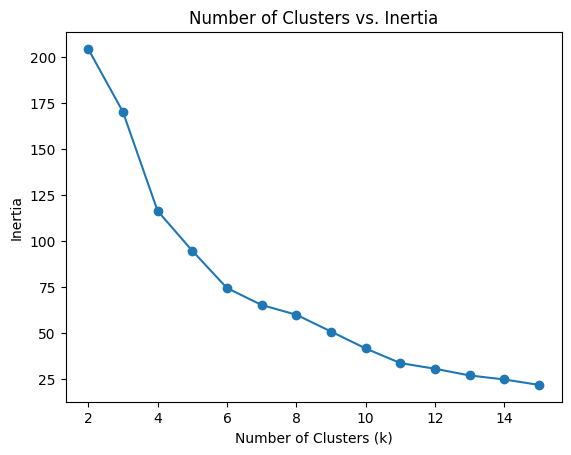

In [18]:
# 3b. Create a plot with the number of clusters on the x-axis and the inertia on the y-axis

# plot the inertia values
import matplotlib.pyplot as plt

# turn the list into a series for plotting
inertia_series_scaled = pd.Series(inertia_values_scaled, index=range(2, 16))

# plot the data
inertia_series_scaled.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

In [20]:
# 3c. Identify the elbow of the plot: let's look at 6 clusters
k = 6

In [21]:
# 3d. Fit a K-Means Clustering model on the specific number of clusters at the elbow
kmeans6 = KMeans(n_clusters=6, n_init='auto', random_state=42)
kmeans6.fit(data_scaled)

KMeans(n_clusters=6, random_state=42)

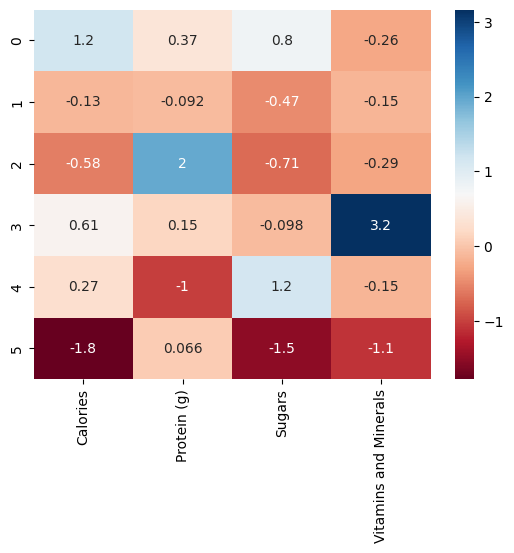

In [22]:
# 3e. Interpret the cluster centers using a heat map
cluster_centers6 = pd.DataFrame(kmeans6.cluster_centers_, columns=data_subset.columns)
sns.heatmap(cluster_centers6, cmap='RdBu', annot=True);

* Cluster 0: **High Calories + Sugar**
* Cluster 1: **Typical Cereals**
* Cluster 2: **High Protein**
* Cluster 3: **High Vitamins and Minerals**
* Cluster 4: **High Sugar, Low Protein**
* Cluster 5: **Low Calories + Sugar + Vitamins and Minerals**

## 4. Select the Best K-Means Model

In [18]:
# 1. Label each row in your original data set with a cluster name from the unstandardized data model and a cluster name from standardized data model

In [23]:
# model 1: assign the cluster name to each row
model1_clusters = pd.Series(kmeans3.labels_, name='model1_clusters')
model1_names = model1_clusters.map({0: 'Typical Cereals',
                                    1: 'Hearty Cereals',
                                    2: 'Empty Cereals'})
model1_names.head()

0      Empty Cereals
1    Typical Cereals
2      Empty Cereals
3      Empty Cereals
4    Typical Cereals
Name: model1_clusters, dtype: object

In [24]:
# model 2: assign the cluster name to each row
model2_clusters = pd.Series(kmeans6.labels_, name='model2_clusters')
model2_names = model2_clusters.map({0: 'High Calories + Sugar',
                                    1: 'Typical Cereals',
                                    2: 'High Protein',
                                    3: 'High Vitamins and Minerals',
                                    4: 'High Sugar, Low Protein',
                                    5: 'Low Calories + Sugar + Vitamins and Minerals'})
model2_names.head()

0                                    High Protein
1                           High Calories + Sugar
2                                    High Protein
3    Low Calories + Sugar + Vitamins and Minerals
4                                 Typical Cereals
Name: model2_clusters, dtype: object

In [21]:
# 2. Look at the number of cereals that fall into each cluster

In [25]:
# view the number of students in each cluster
model1_names.value_counts()

model1_clusters
Typical Cereals    62
Empty Cereals       6
Hearty Cereals      6
Name: count, dtype: int64

In [26]:
# view the number of students in each cluster
model2_names.value_counts()

model2_clusters
Typical Cereals                                 25
High Sugar, Low Protein                         18
High Calories + Sugar                           10
High Protein                                     8
Low Calories + Sugar + Vitamins and Minerals     7
High Vitamins and Minerals                       6
Name: count, dtype: int64

In [24]:
# 3. Decide on the best model for our client
# Model 1 has most cereals in a single cluster vs Model 2 has a better distribution, so let's go with Model 2

In [25]:
# 4. Recommend a specific number of displays

**Original Goal**: Help our client, Maven Supermarket, set up cereal displays around their store based on various niches of cereals

**Our Recommendation**: Create 3 displays for:
* Typical cereal
* Sugary cereal
* Healthy cereal

In [26]:
# 5. Suggest a few cereals that should be shown in each display

#### 1. Typical cereals to display in the cereal aisle

In [27]:
# combine the cluster names with the original data set
cluster_names = pd.concat([df, model1_names, model2_names], axis=1)
cluster_names.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
0,100%_Bran,Nabisco,70,4,1,6,25,Empty Cereals,High Protein
1,100%_Natural_Bran,Quaker Oats,120,3,5,8,0,Typical Cereals,High Calories + Sugar
2,All-Bran,Kelloggs,70,4,1,5,25,Empty Cereals,High Protein
3,All-Bran_with_Extra_Fiber,Kelloggs,50,4,0,0,25,Empty Cereals,Low Calories + Sugar + Vitamins and Minerals
4,Almond_Delight,Ralston Purina,110,2,2,8,25,Typical Cereals,Typical Cereals


In [28]:
# view the typical cereals
cereal_typical = cluster_names[cluster_names.model2_clusters == 'Typical Cereals']
cereal_typical.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
4,Almond_Delight,Ralston Purina,110,2,2,8,25,Typical Cereals,Typical Cereals
8,Bran_Chex,Ralston Purina,90,2,1,6,25,Typical Cereals,Typical Cereals
9,Bran_Flakes,Post,90,3,0,5,25,Typical Cereals,Typical Cereals
13,Clusters,General Mills,110,3,2,7,25,Typical Cereals,Typical Cereals
15,Corn_Chex,Ralston Purina,110,2,0,3,25,Typical Cereals,Typical Cereals


In [29]:
# view the top manufacturers
cluster_names.Manufacturer.value_counts()

Manufacturer
Kelloggs                       23
General Mills                  22
Quaker Oats                     8
Post                            8
Nabisco                         6
Ralston Purina                  6
American Home Food Products     1
Name: count, dtype: int64

In [30]:
# select one cereal from each major manufacturer -- maybe corn flakes and cheerios
cereal_typical[cereal_typical.Manufacturer.isin(['Kelloggs', 'General Mills'])].head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
13,Clusters,General Mills,110,3,2,7,25,Typical Cereals,Typical Cereals
16,Corn_Flakes,Kelloggs,100,2,0,2,25,Typical Cereals,Typical Cereals
19,Cracklin'_Oat_Bran,Kelloggs,110,3,3,7,25,Typical Cereals,Typical Cereals
21,Crispix,Kelloggs,110,2,0,3,25,Typical Cereals,Typical Cereals
26,Frosted_Mini-Wheats,Kelloggs,100,3,0,7,25,Typical Cereals,Typical Cereals


#### 2. Sugary cereals to display near the snacks & candy aisle

In [31]:
# view the sugary cereals
cereal_sugary = cluster_names[cluster_names.model2_clusters.isin(['High Calories + Sugar',
                                                                  'High Sugar, Low Protein'])]
cereal_sugary.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
1,100%_Natural_Bran,Quaker Oats,120,3,5,8,0,Typical Cereals,High Calories + Sugar
5,Apple_Cinnamon_Cheerios,General Mills,110,2,2,10,25,Typical Cereals,"High Sugar, Low Protein"
6,Apple_Jacks,Kelloggs,110,2,0,14,25,Typical Cereals,"High Sugar, Low Protein"
7,Basic_4,General Mills,130,3,2,8,25,Typical Cereals,High Calories + Sugar
10,Cap'n'Crunch,Quaker Oats,120,1,2,12,25,Typical Cereals,"High Sugar, Low Protein"


In [32]:
# sort by most sugar -- maybe golden crisp and smacks
cereal_sugary.sort_values('Sugars', ascending=False).head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
29,Golden_Crisp,Post,100,2,0,15,25,Typical Cereals,"High Sugar, Low Protein"
63,Smacks,Kelloggs,110,2,1,15,25,Typical Cereals,"High Sugar, Low Protein"
6,Apple_Jacks,Kelloggs,110,2,0,14,25,Typical Cereals,"High Sugar, Low Protein"
49,Post_Nat._Raisin_Bran,Post,120,3,1,14,25,Typical Cereals,High Calories + Sugar
14,Cocoa_Puffs,General Mills,110,1,1,13,25,Typical Cereals,"High Sugar, Low Protein"


#### 3. Healthy cereals to display near the healthy foods aisle

In [33]:
# view the healthy cereals
cereal_healthy = cluster_names[cluster_names.model2_clusters.isin(['High Protein',
                                                                   'High Vitamins and Minerals',
                                                                   'Low Calories + Sugar + Vitamins and Minerals'])]
cereal_healthy.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
0,100%_Bran,Nabisco,70,4,1,6,25,Empty Cereals,High Protein
2,All-Bran,Kelloggs,70,4,1,5,25,Empty Cereals,High Protein
3,All-Bran_with_Extra_Fiber,Kelloggs,50,4,0,0,25,Empty Cereals,Low Calories + Sugar + Vitamins and Minerals
11,Cheerios,General Mills,110,6,2,1,25,Typical Cereals,High Protein
20,Cream_of_Wheat_(Quick),Nabisco,100,3,0,0,0,Typical Cereals,Low Calories + Sugar + Vitamins and Minerals


In [34]:
# sort by most protein -- maybe cheerios and special k
cereal_healthy.sort_values('Protein (g)', ascending=False).head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
11,Cheerios,General Mills,110,6,2,1,25,Typical Cereals,High Protein
64,Special_K,Kelloggs,110,6,0,3,25,Typical Cereals,High Protein
54,Quaker_Oatmeal,Quaker Oats,100,5,2,-1,0,Typical Cereals,High Protein
0,100%_Bran,Nabisco,70,4,1,6,25,Empty Cereals,High Protein
53,Quaker_Oat_Squares,Quaker Oats,100,4,1,6,25,Typical Cereals,High Protein


## 5. Hierarchical Clustering

In [35]:
# view the original data
data.head()

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,70,4,1,6,25
1,120,3,5,8,0
2,70,4,1,5,25
3,50,4,0,0,25
4,110,2,2,8,25


In [36]:
# view the standardized data without fat
data_scaled.head()

,Calories,Protein (g),Sugars,Vitamins and Minerals
0,-1.940286,1.387392,-0.173586,-0.149270
1,0.789394,0.462464,0.277129,-1.253871
2,-1.940286,1.387392,-0.398944,-0.149270
3,-3.032158,1.387392,-1.525731,-0.149270
4,0.243458,-0.462464,0.277129,-0.149270


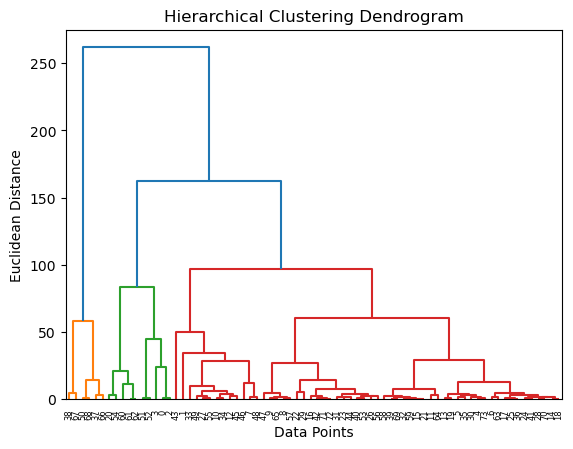

In [37]:
# 1. Create a dendrogram using the 5 numeric fields of the cereal data set
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = linkage(data, method='ward')
dendrogram_info = dendrogram(linkage_matrix, color_threshold=100)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

In [38]:
# 2. Visually identify the ”best” number of clusters and adjust the color_threshold: there seem to be three or four clusters

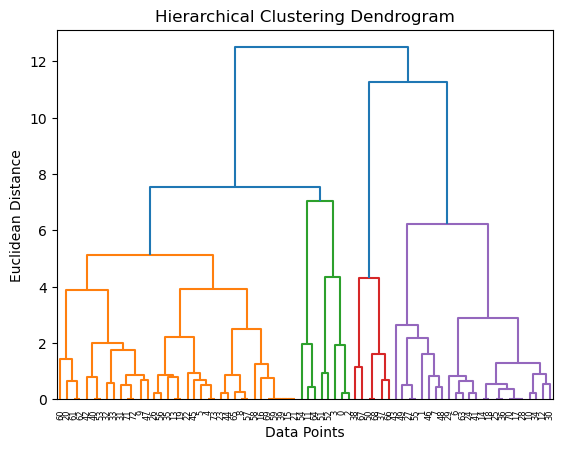

In [39]:
# 3. Create a dendrogram using the 4 numeric, standardized fields (excluding “Fat”) of the cereal data set
linkage_matrix_scaled = linkage(data_scaled, method='ward')
dendrogram_info_scaled = dendrogram(linkage_matrix_scaled, color_threshold=7.5)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

In [40]:
# 4. Visually identify the ”best” number of clusters and adjust the color_threshold: there seem to be four clusters

In [41]:
# 5. Fit an agglomerative clustering model on the scaled data set with four clusters and view the labels
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(4)
agg.fit(data_scaled)

agg.labels_

array([0, 1, 0, 0, 3, 3, 1, 1, 3, 3, 1, 0, 1, 3, 1, 3, 3, 1, 1, 3, 3, 3,
       3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 2, 2, 3, 3, 1, 3, 1,
       3, 3, 1, 3, 1, 1, 2, 0, 0, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3,
       2, 2, 2, 3, 1, 3, 3, 3])

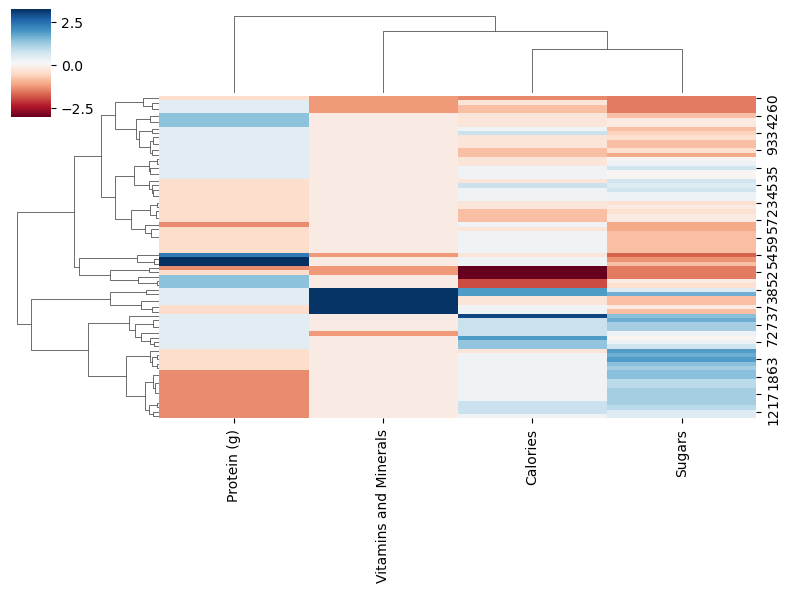

In [42]:
# 6. Create a cluster map of the “best” results and interpret the clusters
sns.clustermap(data_scaled, method='ward', cmap='RdBu', figsize=(8,6), xticklabels=data_scaled.columns)
plt.show()

* Cluster orange: **General Cereals**
* Cluster green: **High Protein**
* Cluster red: **High Vitamins and Minerals**
* Cluster purple: **High Sugar**

## 6. DBSCAN

In [43]:
# 1. Copy over the function that loops through multiple eps and min_samples values to fit multiple DBSCAN models
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def tune_dbscan(data):

    results = []

    # define a range of eps and min_samples values to loop through
    eps_values = np.arange(.1, 2, .1)
    min_samples_values = np.arange(2, 10, 1)

    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_

            # count the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            # count the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)

            # calculate the silhouette score (excluding noise points)
            if n_clusters > 1:  # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None

            results.append([eps, min_samples, n_clusters, n_noise, silhouette])

    # put the results in a dataframe
    dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                    "Number of Noise Points", "Silhouette Score"])
    return dbscan_results

In [44]:
# 2. Apply the function on both the original and standardized data sets

In [45]:
# tune dbscan on the data
dbscan_results_1 = tune_dbscan(data)
dbscan_results_1.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,7,59,-0.302829
1,0.1,3,1,71,NaN
2,0.1,4,0,74,NaN
3,0.1,5,0,74,NaN
4,0.1,6,0,74,NaN


In [46]:
# tune dbscan on the scaled data
dbscan_results_2 = tune_dbscan(data_scaled)
dbscan_results_2.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,12,46,-0.013101
1,0.1,3,2,66,-0.213158
2,0.1,4,1,69,NaN
3,0.1,5,1,69,NaN
4,0.1,6,0,74,NaN


In [47]:
# 3. Find the highest silhouette score and note down the eps and min_samples values

In [48]:
# top results for data
(dbscan_results_1.sort_values('Silhouette Score', ascending=False)
               .groupby('Silhouette Score')
               .head(1)).head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
136,1.8,2,12,23,0.230822
120,1.6,2,13,25,0.154347
145,1.9,3,6,35,0.085334
138,1.8,4,6,36,0.074636
96,1.3,2,13,34,0.051047


In [49]:
# top results for data_v2
(dbscan_results_2.sort_values('Silhouette Score', ascending=False)
               .groupby('Silhouette Score')
               .head(1)).head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
146,1.9,4,2,2,0.435090
138,1.8,4,2,3,0.422208
130,1.7,4,2,6,0.414533
129,1.7,3,2,3,0.413635
113,1.5,3,2,9,0.413283


The highest silhouette score is for eps = 1.9 and min_samples = 4 on the scaled data.

In [50]:
# 4. Fit a final DBSCAN model with those eps and min_samples values and view the labels
dbscan_final = DBSCAN(eps=1.9, min_samples=4)
dbscan_final.fit(data_scaled)

DBSCAN(eps=1.9, min_samples=4)

In [51]:
# view the cluster labels
dbscan_final.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,
        1,  0,  0,  0,  0,  0])

In [52]:
# view the value counts
from collections import Counter

Counter(dbscan_final.labels_)

Counter({0: 68, 1: 4, -1: 2})